# WE09_CNN

# Introduction

## Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)  # for reproducibility


## Importing the Fashion MNIST dataset

In [2]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Since the class names are not included with the dataset, storing them here to use later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocessing the data

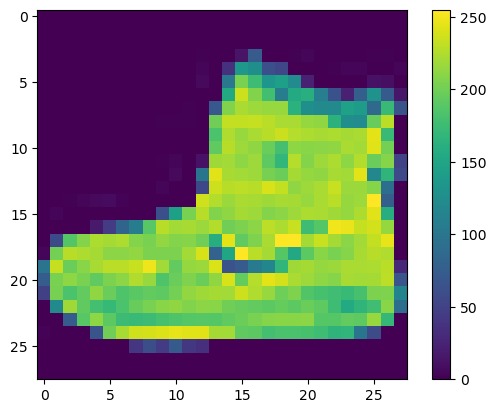

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


This code reshapes the `train_images` and `test_images` arrays to have a fourth dimension, making them suitable for a model that expects input with four dimensions (such as a convolutional neural network). Specifically, each image is reshaped from 28x28 pixels to 28x28x1, where 1 represents a single color channel (grayscale). The pixel values are then converted to `float32` for precision and normalized by dividing by 255, scaling them to a range between 0 and 1. This normalization is a common preprocessing step to help the model learn more efficiently.

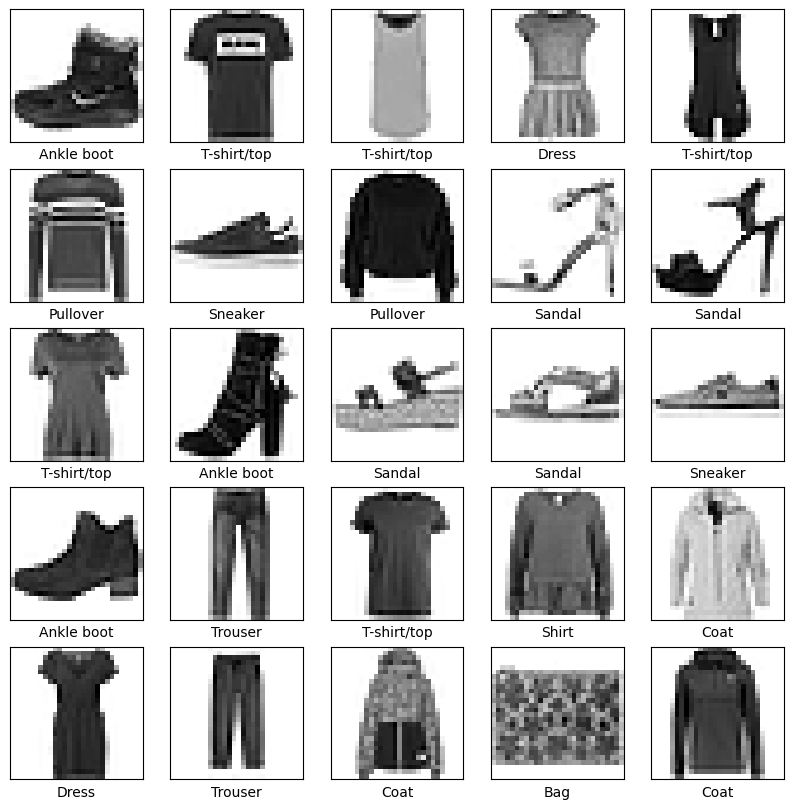

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

This code generates a 10x10 inch figure and displays the first 25 images from `train_images` in a 5x5 grid. Each image is shown without axis ticks and grid lines, using a grayscale color map. Below each image, the corresponding label from `class_names`, indexed by `train_labels`, is displayed as text. This visualization helps to inspect the training images along with their labels, providing a quick overview of the dataset's content.

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

This code converts the `train_labels` and `test_labels` into one-hot encoded vectors using the `to_categorical` function. One-hot encoding transforms integer labels into a binary matrix representation, which is necessary for multi-class classification tasks in machine learning models, allowing them to predict the probability of each class more effectively.

## Building the Model

In [13]:
# Build the CNN model by max-pooling layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


The code defines a Convolutional Neural Network (CNN) model using a sequential approach. Initially, it sets up a 2D convolutional layer with 32 filters and a kernel size of 3x3, applying the ReLU activation function, designed for processing 28x28 pixel images with a single color channel. This is followed by a max-pooling layer to reduce the dimensionality. The model then includes two more convolutional layers, each with 64 filters and ReLU activation, interspersed with max-pooling layers for further spatial reduction. After the convolutional and pooling layers, the network flattens the output to a single vector, which feeds into a dense layer of 64 neurons with ReLU activation. The architecture concludes with a 10-neuron dense layer using softmax activation, predicting the class probabilities for each of the 10 possible categories.

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

This code compiles the CNN model, setting 'adam' as the optimizer, 'categorical_crossentropy' as the loss function, and tracking 'accuracy' as the performance metric. This setup optimizes the model's parameters during training to minimize the loss function, aiming to improve classification accuracy.

In [15]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7156 - loss: 0.7730 - val_accuracy: 0.8587 - val_loss: 0.3955
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8714 - loss: 0.3613 - val_accuracy: 0.8784 - val_loss: 0.3353
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8873 - loss: 0.3055 - val_accuracy: 0.8855 - val_loss: 0.3104
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9027 - loss: 0.2679 - val_accuracy: 0.8900 - val_loss: 0.3024
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9123 - loss: 0.2411 - val_accuracy: 0.8953 - val_loss: 0.2860
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9196 - loss: 0.2189 - val_accuracy: 0.9040 - val_loss: 0.2744
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9269 - loss: 0.1965 - val_accuracy: 0.9057 - val_loss: 0.2732
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9307 - loss: 0.1843 - val_

This code trains the CNN model using the training data (`train_images` and `train_labels`) for 10 epochs with a batch size of 64. During training, it also evaluates the model on the test dataset (`test_images` and `test_labels`) to monitor its performance on unseen data. The training process adjusts the model's weights to minimize the loss on the training data, while the validation data helps assess the model's generalization ability. The `history` object captures the training and validation metrics over each epoch, useful for analyzing the model's learning progress.

## Evaluate the model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.2938
Test accuracy: 0.9107000231742859


In [17]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Train accuracy:', train_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9492 - loss: 0.1338
Train accuracy: 0.9497166872024536


## Making predictions

In [18]:
# Make predictions
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


## Verify predictions

In [19]:
#Defining functions to graph the full set of 10 class predictions
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_labels[i]), images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



These functions are used to plot visualizations for the predicted and actual labels of images. The `plot_image` function displays an image (`img`) along with its predicted label's probability distribution (`predictions_array`) and the actual label (`true_label`). If the prediction matches the true label, the label is shown in blue; otherwise, it's shown in red. The `plot_value_array` function plots a bar chart of the prediction probabilities for each class, highlighting the predicted and true labels in red and blue, respectively.

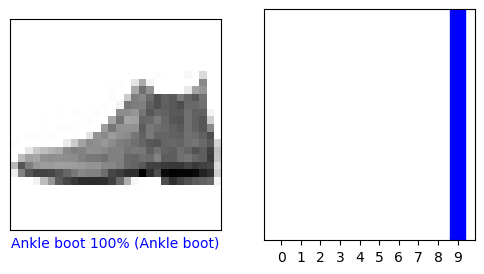

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

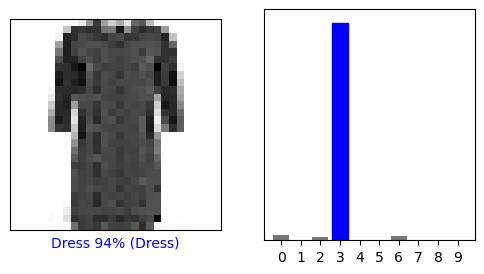

In [21]:
i = 9898
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

## Summary